### ANALYSING THE TRAFFIC DEMOGRAPHICS IN THE UK - Modeling & Predictive Analytics

Richard Abraham

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd

# To make all outputs show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Reading in pre-processed and transformed data 

file = 'C:/Users/Admin/Desktop/BDA 106/Project/NEW_Dataset/Predictive_Modelling/predictive_analytics.csv'

dataset = pd.read_csv(file, low_memory = False)

In [3]:
dataset.head()

,Unnamed: 0,Carriageway_Hazards,Day_of_Week,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(Highway),Longitude,Number_of_Casualties,Number_of_Vehicles,...,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Type,X1st_Point_of_Impact,Target_Severe_Indicator,Daytime,Ped_Cross_Human,Ped_Cross_Physical,Age_Band_of_Driver_order
0,2,None,Friday,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,...,Did not leave carriageway,0.0,Going ahead other,Car,Front,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,5.0
1,4,None,Tuesday,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,...,Did not leave carriageway,0.0,Moving off,Car,Did not impact,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,5.0
2,5,None,Tuesday,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,...,Did not leave carriageway,0.0,Going ahead other,Motorcycle 125cc and under,Did not impact,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,3.0
3,7,None,Thursday,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,-0.211277,1,2,...,Did not leave carriageway,0.0,Parked,Car,Back,0.0,evening (19-23),None within 50 metres,No physical crossing facilities within 50 metres,4.0
4,8,None,Friday,Not at junction or within 20 metres,51.502260,Daylight,Kensington and Chelsea,-0.187623,2,1,...,Nearside,0.0,Going ahead other,Car,Front,0.0,afternoon rush (15-19),None within 50 metres,No physical crossing facilities within 50 metres,7.0


In [4]:
# Dropping unnamed column
dataset.drop(dataset.columns[0],axis=1,inplace=True)

In [5]:
dataset.head()

,Carriageway_Hazards,Day_of_Week,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(Highway),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,...,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Type,X1st_Point_of_Impact,Target_Severe_Indicator,Daytime,Ped_Cross_Human,Ped_Cross_Physical,Age_Band_of_Driver_order
0,None,Friday,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,-0.173862,1,1,Dry,...,Did not leave carriageway,0.0,Going ahead other,Car,Front,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,5.0
1,None,Tuesday,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,Wet or damp,...,Did not leave carriageway,0.0,Moving off,Car,Did not impact,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,5.0
2,None,Tuesday,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,Wet or damp,...,Did not leave carriageway,0.0,Going ahead other,Motorcycle 125cc and under,Did not impact,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,3.0
3,None,Thursday,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,-0.211277,1,2,Dry,...,Did not leave carriageway,0.0,Parked,Car,Back,0.0,evening (19-23),None within 50 metres,No physical crossing facilities within 50 metres,4.0
4,None,Friday,Not at junction or within 20 metres,51.502260,Daylight,Kensington and Chelsea,-0.187623,2,1,Dry,...,Nearside,0.0,Going ahead other,Car,Front,0.0,afternoon rush (15-19),None within 50 metres,No physical crossing facilities within 50 metres,7.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263105 entries, 0 to 1263104
Data columns (total 36 columns):
Carriageway_Hazards                 1263105 non-null object
Day_of_Week                         1263105 non-null object
Junction_Detail                     1263105 non-null object
Latitude                            1263105 non-null float64
Light_Conditions                    1263105 non-null object
Local_Authority_(Highway)           1263105 non-null object
Longitude                           1263105 non-null float64
Number_of_Casualties                1263105 non-null int64
Number_of_Vehicles                  1263105 non-null int64
Road_Surface_Conditions             1263105 non-null object
Road_Type                           1263105 non-null object
Special_Conditions_at_Site          1263105 non-null object
Speed_limit                         1263105 non-null float64
Urban_or_Rural_Area                 1263105 non-null object
Weather_Conditions                  1263105 no

#### Converting 'Object' to 'category' dtype - Saves memory

In [7]:
for col in set(dataset.columns) - set(dataset.describe().columns):
    dataset[col] = dataset[col].astype('category')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263105 entries, 0 to 1263104
Data columns (total 36 columns):
Carriageway_Hazards                 1263105 non-null category
Day_of_Week                         1263105 non-null category
Junction_Detail                     1263105 non-null category
Latitude                            1263105 non-null float64
Light_Conditions                    1263105 non-null category
Local_Authority_(Highway)           1263105 non-null category
Longitude                           1263105 non-null float64
Number_of_Casualties                1263105 non-null int64
Number_of_Vehicles                  1263105 non-null int64
Road_Surface_Conditions             1263105 non-null category
Road_Type                           1263105 non-null category
Special_Conditions_at_Site          1263105 non-null category
Speed_limit                         1263105 non-null float64
Urban_or_Rural_Area                 1263105 non-null category
Weather_Conditions          

### Random Sampling - removed rows at random to speed up model run times (for testing purposes only) 
Considering the imbalance of classes in the target variable, it may be worth using random stratified sampling to maintain proportionality of classes of the original dataset (Stratified sampling not carried out here however)

In [10]:
np.random.seed(150)

remove_n = 1100000 #Sample size to remove from original dataset
df = dataset
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)

In [11]:
df_subset.shape
df_subset.head()

(163105, 36)

,Carriageway_Hazards,Day_of_Week,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(Highway),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,...,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Type,X1st_Point_of_Impact,Target_Severe_Indicator,Daytime,Ped_Cross_Human,Ped_Cross_Physical,Age_Band_of_Driver_order
1,None,Tuesday,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,-0.203238,1,2,Wet or damp,...,Did not leave carriageway,0.0,Moving off,Car,Did not impact,0.0,office hours (10-15),None within 50 metres,No physical crossing facilities within 50 metres,5.0
6,None,Tuesday,T or staggered junction,51.492622,Darkness - lights lit,Kensington and Chelsea,-0.157753,1,2,Wet or damp,...,Offside,0.0,Going ahead other,Car,Front,0.0,morning rush (5-10),None within 50 metres,No physical crossing facilities within 50 metres,3.0
7,None,Tuesday,T or staggered junction,51.492622,Darkness - lights lit,Kensington and Chelsea,-0.157753,1,2,Wet or damp,...,Did not leave carriageway,0.0,Turning left,Car,Did not impact,0.0,morning rush (5-10),None within 50 metres,No physical crossing facilities within 50 metres,3.0
12,None,Saturday,T or staggered junction,51.495498,Darkness - lights lit,Kensington and Chelsea,-0.174925,1,1,Dry,...,Did not leave carriageway,0.0,Going ahead other,Car,Front,1.0,night (23-5),None within 50 metres,No physical crossing facilities within 50 metres,3.0
49,None,Saturday,Crossroads,51.517616,Daylight,Kensington and Chelsea,-0.203733,1,2,Dry,...,Did not leave carriageway,0.0,Going ahead other,Motorcycle 50cc and under,Front,0.0,morning rush (5-10),None within 50 metres,No physical crossing facilities within 50 metres,4.0


In [12]:
# 85% to 15% distribution of target class - Proportionality of the original dataset is still maintained
df_subset['Target_Severe_Indicator'].value_counts()

0.0    139876
1.0     23229
Name: Target_Severe_Indicator, dtype: int64

### Splitting target variable from predictor variables

In [13]:
dataset_X = df_subset.drop('Target_Severe_Indicator', axis=1)  
dataset_Y = df_subset['Target_Severe_Indicator']  

In [14]:
# Converting independent categorical features to Numerical by creating Dummy variables

dataset_X_dummy = pd.get_dummies(dataset_X)
#print(dataset_X_dummy.head())

In [15]:
dataset_X_dummy.shape

(163105, 753)

## Feature Selection

### 1. Applying VarianceThreshold filter

In [16]:
from sklearn.feature_selection import VarianceThreshold

# threshold set to 87% for variance 
# i.e. if 87% of the column data is the same (i.e. low variation), the column will not be as useful
# in the prediction
thresh=(.85 * (1 - .85))

In [17]:
# Wrapper function to identify low variance features and remove them from the dataframe 

def get_low_variance_columns(dframe=None, columns=None,
                             skip_columns=None, thresh=0.0,
                             autoremove=False):
    try:
        # get list of all the original df columns
        all_columns = dframe.columns

        # remove `skip_columns`
        remaining_columns = all_columns.drop(skip_columns)

        # get length of new index
        max_index = len(remaining_columns) - 1

        # get indices for `skip_columns`
        skipped_idx = [all_columns.get_loc(column)
                       for column
                       in skip_columns]

        # adjust insert location by the number of columns removed
        # (for non-zero insertion locations) to keep relative
        # locations intact
        for idx, item in enumerate(skipped_idx):
            if item > max_index:
                diff = item - max_index
                skipped_idx[idx] -= diff
            if item == max_index:
                diff = item - len(skip_columns)
                skipped_idx[idx] -= diff
            if idx == 0:
                skipped_idx[idx] = item

        # get values of `skip_columns`
        skipped_values = dframe.iloc[:, skipped_idx].values

        # get dataframe values
        X = dframe.loc[:, remaining_columns].values

        # instantiate VarianceThreshold object
        vt = VarianceThreshold(threshold=thresh)

        # fit vt to data
        vt.fit(X)

        # get the indices of the features that are being kept
        feature_indices = vt.get_support(indices=True)

        # remove low-variance columns from index
        feature_names = [remaining_columns[idx]
                         for idx, _
                         in enumerate(remaining_columns)
                         if idx
                         in feature_indices]

        # get the columns to be removed
        removed_features = list(np.setdiff1d(remaining_columns,
                                             feature_names))
        print("Found {0} low-variance columns."
              .format(len(removed_features)))

        # remove the columns
        if autoremove:
            print("Removing low-variance features.")
            # remove the low-variance columns
            X_removed = vt.transform(X)

            print("Reassembling the dataframe (with low-variance "
                  "features removed).")
            # re-assemble the dataframe
            dframe = pd.DataFrame(data=X_removed,
                                  columns=feature_names)

            # add back the `skip_columns`
            for idx, index in enumerate(skipped_idx):
                dframe.insert(loc=index,
                              column=skip_columns[idx],
                              value=skipped_values[:, idx])
            print("Succesfully removed low-variance columns.")

        # do not remove columns
        else:
            print("No changes have been made to the dataframe.")

    except Exception as e:
        print(e)
        print("Could not remove low-variance features. Something "
              "went wrong.")
        pass

    return dframe, removed_features

In [18]:
# retrieve new dataframe (with low variance features)
dataset_X_new, low_var_col = get_low_variance_columns(dataset_X_dummy,[],[],thresh, True) 
#Set to True to remove low variance columns

Found 715 low-variance columns.
Removing low-variance features.
Reassembling the dataframe (with low-variance features removed).
Succesfully removed low-variance columns.


In [19]:
dataset_X_new.shape

(163105, 38)

In [20]:
dataset_X_new.head()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Age_Band_of_Driver_order,Day_of_Week_Friday,...,Sex_of_Driver_Female,Sex_of_Driver_Male,Vehicle_Manoeuvre_Going ahead other,Vehicle_Type_Car,X1st_Point_of_Impact_Back,X1st_Point_of_Impact_Front,Daytime_afternoon rush (15-19),Daytime_morning rush (5-10),Daytime_office hours (10-15),Ped_Cross_Physical_No physical crossing facilities within 50 metres
0,51.515540,-0.203238,1.0,2.0,30.0,1.0,2976.0,0.0,5.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,51.492622,-0.157753,1.0,2.0,30.0,2.0,698.0,0.0,3.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,51.492622,-0.157753,1.0,2.0,30.0,4.0,2148.0,0.0,3.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,51.495498,-0.174925,1.0,1.0,30.0,1.0,1997.0,0.0,3.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,51.517616,-0.203733,1.0,2.0,30.0,3.0,49.0,0.0,4.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


**Normalizing data** - adjusting values measured on different scales to a notionally common scale (between 0 - 1)

In [21]:
dataset_X_normalized=(dataset_X_new-dataset_X_new.min())/(dataset_X_new.max()-dataset_X_new.min())

In [22]:
dataset_X_normalized.head()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Age_Band_of_Driver_order,Day_of_Week_Friday,...,Sex_of_Driver_Female,Sex_of_Driver_Male,Vehicle_Manoeuvre_Going ahead other,Vehicle_Type_Car,X1st_Point_of_Impact_Back,X1st_Point_of_Impact_Front,Daytime_afternoon rush (15-19),Daytime_morning rush (5-10),Daytime_office hours (10-15),Ped_Cross_Physical_No physical crossing facilities within 50 metres
0,0.142774,0.788285,0.0,0.015152,0.2,0.000000,0.106284,0.0,0.571429,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.140562,0.793194,0.0,0.015152,0.2,0.014493,0.023820,0.0,0.285714,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.140562,0.793194,0.0,0.015152,0.2,0.043478,0.076310,0.0,0.285714,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.140839,0.791340,0.0,0.000000,0.2,0.000000,0.070844,0.0,0.285714,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.142975,0.788231,0.0,0.015152,0.2,0.028986,0.000326,0.0,0.428571,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [23]:
df_X=dataset_X_normalized.round(3) 

In [24]:
df_X.head(3)

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Age_Band_of_Driver_order,Day_of_Week_Friday,...,Sex_of_Driver_Female,Sex_of_Driver_Male,Vehicle_Manoeuvre_Going ahead other,Vehicle_Type_Car,X1st_Point_of_Impact_Back,X1st_Point_of_Impact_Front,Daytime_afternoon rush (15-19),Daytime_morning rush (5-10),Daytime_office hours (10-15),Ped_Cross_Physical_No physical crossing facilities within 50 metres
0,0.143,0.788,0.0,0.015,0.2,0.000,0.106,0.0,0.571,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.141,0.793,0.0,0.015,0.2,0.014,0.024,0.0,0.286,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.141,0.793,0.0,0.015,0.2,0.043,0.076,0.0,0.286,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Dealing with Imbalanced Data

### 1. Change the Performance Metric before treating imbalance in dataset

#### Popular metric
The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in the dataset. However, in the case of imbalanced classes this metric can be misleading, as high scores do not show prediction capacity for the minority class. One may have a 99% accuracy but a low prediction capacity on the class they are truly interested in (eg. anomaly detection where anomalies are rare classes in a dataset). 

Therefore, we start by calculating alternate performance measures such as AUC, recall and F1 scores.

**AUC - ROC** curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

**recall** refers to the percentage of total relevant results correctly classified by the algorithm.

The **F1 score** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

In [25]:
dataset_Y.value_counts()

0.0    139876
1.0     23229
Name: Target_Severe_Indicator, dtype: int64

In [26]:
# Using Logistic Regression to train model using imbalanced data (at first)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

In [28]:
# 80 train -20 test split
X_train, X_test, y_train, y_test = train_test_split(df_X, dataset_Y, test_size=0.2, random_state=42)

In [29]:
# Train model using the 'saga' solver which is faster for large datasets
clf_0 = LogisticRegression(solver='saga',max_iter=2500).fit(X_train, y_train)

In [30]:
# Predict on testing set
pred_y_0 = clf_0.predict(X_test)

In [31]:
print("Accuracy : ", round(accuracy_score(y_test, pred_y_0),4))

Accuracy :  0.8575


Accuracy seems high! but it does not mean the model is good. The model is highly biased towards the majority class. It is for this reason that using Accuracy as a performance metric is quite misleading for higly imbalanced datasets.

#### AUC of model trained on imbalanced dataset - Logisitc Regression

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
# To calculate AUROC, we need predicted class probabilities instead of just the predicted classes 
# We get them using the .predict_proba()
prob_y_0 = clf_0.predict_proba(X_test)
prob_y_0 = [p[1] for p in prob_y_0]
 
print(roc_auc_score(y_test, prob_y_0))

0.6852303336337825


In [34]:
from sklearn.metrics import recall_score

# recall_score
recall_score(y_test, pred_y_0)

0.004080756013745705

In [35]:
from sklearn.metrics import f1_score
# f1 score
f1_score(y_test, pred_y_0)

0.00810753147002347

As seen above, although the accuracy is relatively high, recall and f1-scores are quite low indicating a poor model.

### 2. Next, we up-sample the minority class using SMOTE - synthetic sampling of minority class
TO KEEP IN MIND - random oversampling can lead to overfitting (WILL NEED TO TEST MODEL FOR OVERFITTING AT A LATER STAGE)

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
# ratio of 0.55 results in a target class variation of approximately 65% (majority class) to 35% (minority class)
# It is important to carry out SMOTE only on the training data and not on the test data

smote = SMOTE(random_state=12,ratio=0.55)
x_train_res, y_train_res = smote.fit_sample(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
# Count of Labels in the Training Set

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 18573
Before OverSampling, counts of label '0': 111911 



In [39]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 61551
After OverSampling, counts of label '0': 111911


In [40]:
# Train model again using Logistic Rregression but on the OVERSAMPLED dataset

clf_1 = LogisticRegression(solver='saga',max_iter=2500).fit(x_train_res, y_train_res)

In [41]:
# Predict on testing set
pred_y_1 = clf_1.predict(X_test)

In [42]:
print("Accuracy : ", round(accuracy_score(y_test, pred_y_1),4))

Accuracy :  0.8061


The accuracy has decreased from earlier which is a good sign in the sense that now the model is classifying the minority class slightly better than before

#### AUC of model trained on oversampled dataset - Logistic Regression

In [43]:
# Predict class probabilities
prob_y_1 = clf_1.predict_proba(X_test)
prob_y_1 = [p[1] for p in prob_y_1]
 
print(roc_auc_score(y_test, prob_y_1))

0.6850457785658681


AUC score after oversampling is the same as before (No change in comparison to auc of original imbalanced dataset - using Logistic Reg)

In [44]:
# recall_score
recall_score(y_test, pred_y_1)

0.31013745704467355

In [45]:
# f1 score
f1_score(y_test, pred_y_1)

0.31350412505427705

Better values for recall and f1-score (after synthetic oversampling) when compared to the model run on the original imbalanced dataset. The higher the recall (closer to 1) the better.

#### Cohen’s kappa

The function cohen_kappa_score computes Cohen’s kappa statistic. This measure is intended to compare labelings by different human annotators, not a classifier versus a ground truth.

The kappa score is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

Kappa scores can be computed for binary or multiclass problems

In [46]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, pred_y_1)

0.2006515054798298

### 3. Penalize Algorithms (Cost-Sensitive Training) 

In [47]:
# from sklearn.svm import SVC

During training, we can use the argument class_weight='balanced'  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True  if we want to enable probability estimates for SVM algorithms.

Let's train a model using Penalized-SVM on the original imbalanced dataset:

In [48]:
# Train model
# clf_3 = SVC(kernel='linear', 
#             class_weight='balanced', # penalize
#             probability=True)

In [49]:
# clf_3.fit(X_train, y_train)

In [50]:
# Predict on testing set
# pred_y_3 = clf_3.predict(X_test)

In [51]:
# print(accuracy_score(y_test, pred_y_3))

In [52]:
# AUC SCORE
# prob_y_3 = clf_3.predict_proba(X_test)
# prob_y_3 = [p[1] for p in prob_y_3]
# print( roc_auc_score(y_test, prob_y_3) )

In [53]:
# recall_score
# recall_score(y_test, pred_y_3)

In [ ]:
# f1 score
# f1_score(y_test, pred_y_3)

In [ ]:
# Kappa Score
# cohen_kappa_score(y_test, pred_y_3)

### 4. Use Tree-Based Algorithms

Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In modern applied machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees.

In [54]:
# Training the model using Random Forrest tree ensemble

from sklearn.ensemble import RandomForestClassifier

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
# Train model - Using original imbalanced dataset at first
clf_4 = RandomForestClassifier()
clf_4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# Predict on testing set
pred_y_4 = clf_4.predict(X_test)

In [57]:
print(accuracy_score(y_test, pred_y_4))

0.8539591060972993


In [58]:
# AUROC score
prob_y_4 = clf_4.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

0.6499274260044003


In [59]:
# recall_score
recall_score(y_test, pred_y_4)

0.062285223367697595

In [60]:
# f1 score
f1_score(y_test, pred_y_4)

0.10853293413173654

Using Decision Forrest - Although the accuracy is high, the recall is still low (but better than Logistic Regression using the original imbalanced dataset). However, it is not as good as Logisitic Regression on the oversampled dataset.

In [61]:
# Now using the oversampled dataset to train a Decsion Tree based model - Random Forrest
clf_10 = RandomForestClassifier()
clf_10.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
# Predict on testing set
pred_y_10 = clf_10.predict(X_test)

In [63]:
print(accuracy_score(y_test, pred_y_10))

0.8490849452806475


In [64]:
# AUROC score
prob_y_10 = clf_10.predict_proba(X_test)
prob_y_10 = [p[1] for p in prob_y_10]
print( roc_auc_score(y_test, prob_y_10) )

0.6573855628015628


In [65]:
# recall_score
recall_score(y_test, pred_y_10)

0.10223367697594501

In [66]:
# f1 score
f1_score(y_test, pred_y_10)

0.16204255319148936

Although the accuracy is higher (when using the oversampled data) for the Decision Tree based model in comparison to the Logistic Regression model, the recall and f1 scores are lower. 

However, the recall and f1 scores did improve in comparison to the model when trained on the original imbalanced dataset using Random Forrest Classifier.

In [67]:
cohen_kappa_score(y_test, pred_y_10) #Kappa score not as good as that of logistic regression model using the oversampled data

0.10928556139912804

#### **As of now Logistic Regression produced the best results when trained on the oversampled dataset

In [68]:
# Using the oversampled dataset to train a Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

clf_11 = GradientBoostingClassifier()
clf_11.fit(x_train_res, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [69]:
# Predict on testing set
pred_y_11 = clf_11.predict(X_test)

In [70]:
print(accuracy_score(y_test, pred_y_11))

0.858863922013427


In [71]:
# AUROC score
prob_y_11 = clf_11.predict_proba(X_test)
prob_y_11 = [p[1] for p in prob_y_11]
print( roc_auc_score(y_test, prob_y_11) )

0.7116638495714144


In [72]:
# recall_score
recall_score(y_test, pred_y_11)

0.03608247422680412

In [73]:
# f1 score
f1_score(y_test, pred_y_11)

0.0680161943319838

Again recall and f1 scores are not as good as logistic Regression using the oversampled dataset. Infact they are lower than that produced by Random Forrest using the oversampled data - **Therefore, we can discard this algorithm for now**

### Gaussian Naive Bayes

In [74]:
# Using the oversampled data

from sklearn.naive_bayes import GaussianNB

clf_12 = GaussianNB()

In [75]:
clf_12.fit(x_train_res, y_train_res)

GaussianNB(priors=None)

In [76]:
# Predict on testing set
pred_y_12 = clf_12.predict(X_test)

In [77]:
print(accuracy_score(y_test, pred_y_12))

0.7437233683823304


In [78]:
# AUROC score
prob_y_12 = clf_12.predict_proba(X_test)
prob_y_12 = [p[1] for p in prob_y_12]
print( roc_auc_score(y_test, prob_y_12) )

0.6629657423399279


In [79]:
# recall_score
recall_score(y_test, pred_y_12)

0.4050687285223368

In [191]:
# f1_score
f1_score(y_test, pred_y_12)

0.3109132871744148

Although the accuracy is lower, GaussianNB seems to produce the best results for f1 and recall scores

In [81]:
# Kappa Score
cohen_kappa_score(y_test, pred_y_12) #Kappa score is still not as good as the logistic regression model using oversampled data

0.1638243110826817

#### For comparison purpose we also train a gaussianNB model on the original imbalanced data

In [82]:
clf_16 = GaussianNB()
clf_16.fit(X_train,y_train)

GaussianNB(priors=None)

In [83]:
# Predict on testing set
pred_y_16 = clf_16.predict(X_test)

In [84]:
print(accuracy_score(y_test, pred_y_16))

0.8206063578676313


In [85]:
# AUROC score
prob_y_16 = clf_16.predict_proba(X_test)
prob_y_16 = [p[1] for p in prob_y_16]
print( roc_auc_score(y_test, prob_y_16) )

0.6687265331664581


In [86]:
# recall_score
recall_score(y_test, pred_y_16)

0.19093642611683848

In [87]:
# recall_score
recall_score(y_test, pred_y_16)

0.19093642611683848

In [88]:
# Kappa Score
cohen_kappa_score(y_test, pred_y_16) #Kappa score not as good as logistic regression model using oversample dataset

0.13700567414720988

Therefore, from the above results for f1 score and recall it can be seen that the model performs better when using the oversampled dataset rather than the original imbalanced dataset

### 5.a) Under-sampling: Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [89]:
# In the code below, use ratio='majority' to resample the majority class.

In [90]:
import matplotlib
import matplotlib.pyplot as plt

In [53]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

# print('Removed indexes:', id_tl)

# plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [54]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before Undersampling, counts of label '1': 29932
Before Undersampling, counts of label '0': 180552 



In [55]:
print("After Undersampling, counts of label '1': {}".format(sum(y_tl==1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_tl==0)))

After Undersampling, counts of label '1': 29932
After Undersampling, counts of label '0': 168168


% variation in the target class did not change much after undersampling (Using Tomek Links) - Still approx 85% to 15% split

Therefore we can expect the same results as seen above (Using the original imbalanced dataset), when using the different algorithms to train and test the model. **In any case Undersampling may not be the best route in our scenario.** In addition, by undersampling we also run the risk of loosing potentially valuable information.

But for the sake of showing the results we run the undersampled data through a few different algorithms

In [56]:
# LOGISTIC REGRESSION

# Train model on undersampled dataset

clf_5 = LogisticRegression(solver='saga',max_iter=2500).fit(X_tl, y_tl)

In [57]:
# Predict on testing set
pred_y_5 = clf_5.predict(X_test)

In [58]:
print("Accuracy : ", round(accuracy_score(y_test, pred_y_5),4))

Accuracy :  0.8601


In [59]:
# Predict class probabilities
prob_y_5 = clf_5.predict_proba(X_test)
prob_y_5 = [p[1] for p in prob_y_5]
 
print(roc_auc_score(y_test, prob_y_5))

0.6744168296526147


In [60]:
# recall_score
recall_score(y_test, pred_y_5)

0.01579160480496693

In [61]:
# f1 score
f1_score(y_test, pred_y_5)

0.0307975783100816

Recall and F1-score is not as good as Randomforrest and much worse than that using Oversampled (SMOTE) data using Logistic Regression

In [62]:
# RANDOM FORREST CLASSIFIER

# Train model using undersampled dataset (derived using TOMEK LINKS)

clf_6 = RandomForestClassifier()
clf_6.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
# Predict on testing set
pred_y_6 = clf_6.predict(X_test)

In [64]:
print(accuracy_score(y_test, pred_y_6))

0.8544877520381596


In [65]:
# AUROC score
prob_y_6 = clf_6.predict_proba(X_test)
prob_y_6 = [p[1] for p in prob_y_6]
print( roc_auc_score(y_test, prob_y_6) )

0.6513282509429013


In [66]:
# recall_score
recall_score(y_test, pred_y_6)

0.08935078958024024

In [67]:
# f1 score
f1_score(y_test, pred_y_6)

0.14742233604275692

F1-score and recall have improved slightly when compared to the RandomForrest Classifer using the original imbalanced dataset but are still not as good as that produced by Logistic Regression on the Oversampled dataset

### 5.b) Under-sampling: Cluster Centroids (another option. Not used here)

Perform under-sampling by generating centroids based on clustering methods.

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

### 5.c) Random Undersampler - Not ideal as it may lead to loss of information

## Feature Selection continued....

### 2. Using RandomForrest Classifiers feature_importance measure

In [91]:
# Training the model on the reduced dataset (38 predictors X 163105 rows)

clf_31 = RandomForestClassifier()
clf_31.fit(df_X, dataset_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
importances = clf_31.feature_importances_

In [93]:
feature_importances = pd.DataFrame(importances,
                                   index = df_X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Giving more importance to features that have less impurity

# Top 20 features
feature_importances.head(20)

,importance
Longitude,0.139214
Latitude,0.136004
Engine_Capacity_.CC.,0.107908
Age_of_Vehicle,0.094642
Age_Band_of_Driver_order,0.067985
Number_of_Vehicles,0.042379
Number_of_Casualties,0.040718
Speed_limit,0.029420
X1st_Point_of_Impact_Front,0.019233
Daytime_afternoon rush (15-19),0.018170


### 3. Recursive Feature Elimination - RFE
Feature ranking with recursive feature elimination

In [94]:
from sklearn.feature_selection import RFE

Cannont use Gaussian Naive Bayes because the classifier does not expose "coef_" or "feature_importances_" attributes that is used in the RFE process.

Therefore, we only use Logistic Regression and Random Forrest Classifiers

In [91]:
# Create the RFE object and rank each feature -  Logistic Regression (On entire dataset - all 753 features)

# clf_30 = LogisticRegression(solver='saga',max_iter=2500)
# rfe = RFE(estimator=clf_30, n_features_to_select=1, step=150)
# rfe.fit(dataset_X_dummy, dataset_Y)
# ranking = rfe.ranking_

# Did not run to completion. Therefore, we perform the operation on the reduced dataset (38 features)

In [95]:
# Create the RFE object and rank each feature -  Logistic Regression (On reduced dataset - 38 features)

clf_30 = LogisticRegression(solver='saga',max_iter=2500)
rfe = RFE(estimator=clf_30, n_features_to_select=1, step=1)
rfe.fit(df_X, dataset_Y)
ranking = rfe.ranking_

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)

In [96]:
names=list(df_X.columns.values)

In [97]:
# selector = rfe.fit(df_X, dataset_Y)
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), ranking), names)))

Features sorted by their rank:
[(1, 'Number_of_Casualties'), (2, 'Number_of_Vehicles'), (3, 'Engine_Capacity_.CC.'), (4, 'X1st_Point_of_Impact_Back'), (5, 'Speed_limit'), (6, 'Age_of_Vehicle'), (7, 'Vehicle_Type_Car'), (8, 'Age_Band_of_Driver_order'), (9, 'Road_Type_Single carriageway'), (10, 'Latitude'), (11, 'Road_Surface_Conditions_Dry'), (12, 'Road_Surface_Conditions_Wet or damp'), (13, 'Vehicle_Location.Restricted_Lane'), (14, 'Light_Conditions_Daylight'), (15, 'Junction_Detail_Not at junction or within 20 metres'), (16, 'Urban_or_Rural_Area_Urban'), (17, 'Propulsion_Code_Petrol'), (18, 'Sex_of_Driver_Female'), (19, 'Junction_Location_Not at or within 20 metres of junction'), (20, 'Junction_Location_Approaching junction or waiting/parked at junction approach'), (21, 'Junction_Detail_T or staggered junction'), (22, 'Junction_Location_Mid Junction - on roundabout or on main road'), (23, 'Weather_Conditions_Fine no high winds'), (24, 'Longitude'), (25, 'Road_Type_Dual carriageway'), 

### 3.a) Recursive feature elimination with cross-validation

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [100]:
from sklearn.metrics import matthews_corrcoef

Optimal number of features : 29


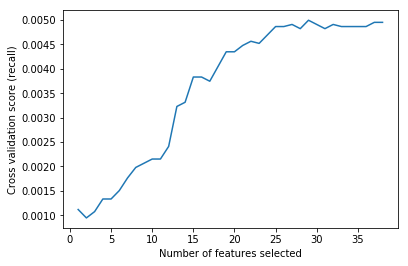

In [101]:
# Create the RFE object and compute a cross-validated score.
clf_32 = LogisticRegression(solver='saga',max_iter=2500)


rfecv = RFECV(estimator=clf_32, step=1, cv=StratifiedKFold(3),
              scoring='recall')
rfecv.fit(df_X, dataset_Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();

From output above - optimal number of features is 29

In [102]:
ranking_rfecv=rfecv.ranking_

In [103]:
ranking_rfecv

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  7,  1,  1,  9,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  1,  1,  4,  5,  1,  1,  6,
        1,  1,  1,  8])

In [107]:
rfecv.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False])

In [106]:
print ("List of optimal features: 29 features in total (out of 38)")
print (sorted(zip(map(lambda x: round(x, 4), ranking_rfecv), names)))

Features sorted by their rank:
[(1, 'Age_Band_of_Driver_order'), (1, 'Age_of_Vehicle'), (1, 'Daytime_afternoon rush (15-19)'), (1, 'Daytime_morning rush (5-10)'), (1, 'Daytime_office hours (10-15)'), (1, 'Driver_Home_Area_Type_Urban area'), (1, 'Engine_Capacity_.CC.'), (1, 'Junction_Detail_Not at junction or within 20 metres'), (1, 'Junction_Detail_T or staggered junction'), (1, 'Junction_Location_Approaching junction or waiting/parked at junction approach'), (1, 'Junction_Location_Mid Junction - on roundabout or on main road'), (1, 'Junction_Location_Not at or within 20 metres of junction'), (1, 'Latitude'), (1, 'Light_Conditions_Daylight'), (1, 'Longitude'), (1, 'Number_of_Casualties'), (1, 'Number_of_Vehicles'), (1, 'Propulsion_Code_Petrol'), (1, 'Road_Surface_Conditions_Dry'), (1, 'Road_Surface_Conditions_Wet or damp'), (1, 'Road_Type_Dual carriageway'), (1, 'Road_Type_Single carriageway'), (1, 'Sex_of_Driver_Female'), (1, 'Speed_limit'), (1, 'Urban_or_Rural_Area_Urban'), (1, 'Vehi

In [139]:
# estimator coefficients for each of the 29 selected features from above
np.absolute(rfecv.estimator_.coef_)

array([[ 0.37236394,  0.11701663, 16.95247261,  5.14392043,  0.61483086,
         0.25678179,  1.10067496,  0.36264944,  0.57198172,  0.52148383,
         0.15586196,  0.20474175,  0.536397  ,  0.45652178,  0.12285283,
         0.50302732,  0.21924947,  0.1620824 ,  0.08899253,  0.28767463,
         0.17121414,  0.33212867,  0.21670485,  0.20725511,  0.67104963,
         0.9013023 ,  0.11687779,  0.18141073,  0.16626025]])

In [ ]:
list_coeff=[0.37236394,  0.11701663, 16.95247261,  5.14392043,  0.61483086,
         0.25678179,  1.10067496,  0.36264944,  0.57198172,  0.52148383,
         0.15586196,  0.20474175,  0.536397  ,  0.45652178,  0.12285283,
         0.50302732,  0.21924947,  0.1620824 ,  0.08899253,  0.28767463,
         0.17121414,  0.33212867,  0.21670485,  0.20725511,  0.67104963,
         0.9013023 ,  0.11687779,  0.18141073,  0.16626025]

In [138]:
# Sorting and listing features by rank/importance in DESC order

zipped = zip(names, list_coeff)  
zipped = list(zipped) 
  
# Features sorted by rank (DESC order of importance)
res = sorted(zipped, key = lambda x: x[1],reverse = True) 
      
# printing result 
print("final list - ", str(res)) 

final list -  [('Number_of_Casualties', 16.95247261), ('Number_of_Vehicles', 5.14392043), ('Engine_Capacity_.CC.', 1.10067496), ('Junction_Location_Not at or within 20 metres of junction', 0.9013023), ('Junction_Location_Mid Junction - on roundabout or on main road', 0.67104963), ('Speed_limit', 0.61483086), ('Age_Band_of_Driver_order', 0.57198172), ('Junction_Detail_T or staggered junction', 0.536397), ('Day_of_Week_Friday', 0.52148383), ('Road_Surface_Conditions_Dry', 0.50302732), ('Light_Conditions_Darkness - lights lit', 0.45652178), ('Latitude', 0.37236394), ('Vehicle_Location.Restricted_Lane', 0.36264944), ('Weather_Conditions_Fine no high winds', 0.33212867), ('Urban_or_Rural_Area_Rural', 0.28767463), ('Age_of_Vehicle', 0.25678179), ('Road_Surface_Conditions_Wet or damp', 0.21924947), ('Driver_Home_Area_Type_Urban area', 0.21670485), ('Junction_Location_Approaching junction or waiting/parked at junction approach', 0.20725511), ('Junction_Detail_Not at junction or within 20 metre

### 4. High Correlation Filter - Not used widely and does not provide much info here - Can be discarded

In [74]:
df_subset.corr()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Target_Severe_Indicator,Age_Band_of_Driver_order
Latitude,1.000000,-0.425193,0.022780,-0.026633,0.038974,-0.082461,0.004703,0.007541,0.021777,0.002221
Longitude,-0.425193,1.000000,-0.022124,0.013509,-0.038220,0.025379,-0.001462,-0.008248,-0.018144,-0.011670
Number_of_Casualties,0.022780,-0.022124,1.000000,0.452289,0.146952,0.003821,0.044556,-0.017601,0.086605,-0.010799
Number_of_Vehicles,-0.026633,0.013509,0.452289,1.000000,0.155865,-0.037679,0.043251,-0.031871,-0.025338,0.031075
Speed_limit,0.038974,-0.038220,0.146952,0.155865,1.000000,-0.028001,0.067066,-0.027005,0.078533,0.002076
Age_of_Vehicle,-0.082461,0.025379,0.003821,-0.037679,-0.028001,1.000000,-0.004107,0.001250,0.010053,-0.039878
Engine_Capacity_.CC.,0.004703,-0.001462,0.044556,0.043251,0.067066,-0.004107,1.000000,0.010729,-0.017387,0.148953
Vehicle_Location.Restricted_Lane,0.007541,-0.008248,-0.017601,-0.031871,-0.027005,0.001250,0.010729,1.000000,0.009202,0.016230
Target_Severe_Indicator,0.021777,-0.018144,0.086605,-0.025338,0.078533,0.010053,-0.017387,0.009202,1.000000,0.028151
Age_Band_of_Driver_order,0.002221,-0.011670,-0.010799,0.031075,0.002076,-0.039878,0.148953,0.016230,0.028151,1.000000


Number_of_Vehicles & Number_of_Casualties - 0.45 (hihgly correlated)

## Feature Reduction

### PCA

In [129]:
# Using reduced dataset after applying variance threshold filter (also normalized)
# Datset used -> dataset_X_normalized

In [140]:
# Splitting validation dataset (80-20 split)
validation_size = 0.20
seed = 7
x_train, x_validation, Y_train, Y_validation = train_test_split(dataset_X_normalized, dataset_Y, test_size=validation_size, random_state=seed)

In [143]:
from sklearn.decomposition import PCA

# We first include all 38 variables
pca = PCA(n_components=38)

pca.fit(x_train)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

PCA(copy=True, iterated_power='auto', n_components=38, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [144]:
# explained variance ratio of each PC (Principal Component)
var

array([1.38368118e-01, 9.31842084e-02, 8.74476813e-02, 7.64023003e-02,
       7.01630699e-02, 6.06767788e-02, 5.83478205e-02, 5.27133797e-02,
       4.24276264e-02, 3.80309475e-02, 3.66850502e-02, 3.26028133e-02,
       2.73043748e-02, 2.43989048e-02, 2.24418586e-02, 2.13212120e-02,
       1.92055849e-02, 1.83996006e-02, 1.53924494e-02, 1.27531587e-02,
       1.04955263e-02, 9.29922757e-03, 6.15153410e-03, 5.41478428e-03,
       5.02156058e-03, 4.84442779e-03, 3.82620927e-03, 2.07790431e-03,
       1.88315785e-03, 1.23926908e-03, 6.71268415e-04, 5.43967178e-04,
       1.46643530e-04, 5.28371846e-05, 4.72641012e-05, 1.74806076e-05,
       2.72882997e-32, 7.71624890e-34])

In [145]:
# PC1 explains 13.8%, PC2 explains 9.3%, PC3 explains 8.7% ......first 10 PCs explain roughly 70% of the variance

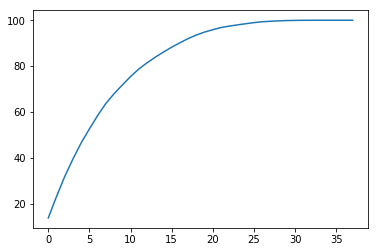

In [146]:
# Displays Cumulative Variance plot
plt.plot(var1)

In [147]:
#Looking at above plot and taking only 28 PCs - explains nearly 100% of the variance in the data
pca = PCA(n_components=28)

X_train_PC=pca.fit_transform(x_train)

In [148]:
X_validation_PC=pca.transform(x_validation)

#### BEFORE TRAINING MODEL.....

In [149]:
# Finding the most important features

pca = PCA(n_components=28)
X_PC=pca.fit_transform(dataset_X_normalized) # Using entire dataset prior to train/test split

x=abs( pca.components_ )

Here, pca.components_ has shape [n_components, n_features]. So [28,38]

In [150]:
# the explained variance ratios for each PC - first 10 PCs explain roughly 70% of the variance

pca.explained_variance_ratio_

array([0.13860558, 0.09322402, 0.08744854, 0.07654981, 0.06999577,
       0.0606349 , 0.05830798, 0.05273467, 0.04238818, 0.03803722,
       0.0367135 , 0.0326533 , 0.02724071, 0.02437606, 0.0223752 ,
       0.02127533, 0.01921877, 0.01838644, 0.01540656, 0.01274837,
       0.01047982, 0.00928581, 0.00614256, 0.00542341, 0.00504282,
       0.00483841, 0.00381281, 0.00206959])

In [151]:
y=dataset_X_normalized.columns.values
y # list of features

array(['Latitude', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Speed_limit', 'Age_of_Vehicle',
       'Engine_Capacity_.CC.', 'Vehicle_Location.Restricted_Lane',
       'Age_Band_of_Driver_order', 'Day_of_Week_Friday',
       'Day_of_Week_Wednesday',
       'Junction_Detail_Not at junction or within 20 metres',
       'Junction_Detail_T or staggered junction',
       'Light_Conditions_Darkness - lights lit',
       'Light_Conditions_Daylight', 'Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Wet or damp',
       'Road_Type_Dual carriageway', 'Road_Type_Single carriageway',
       'Urban_or_Rural_Area_Rural', 'Urban_or_Rural_Area_Urban',
       'Weather_Conditions_Fine no high winds',
       'Driver_Home_Area_Type_Urban area',
       'Junction_Location_Approaching junction or waiting/parked at junction approach',
       'Junction_Location_Mid Junction - on roundabout or on main road',
       'Junction_Location_Not at or within 20 metres of junction',

looking at individual PC contributions - Looking at first 3 PCs as an example

In [152]:
print(x[0])

[8.14504565e-03 1.50328487e-02 1.64809928e-03 1.88659285e-03
 2.20295661e-01 1.45696987e-03 3.12434945e-03 1.00419441e-05
 1.68384016e-03 5.36884798e-04 1.66835431e-03 4.38176890e-01
 3.02855120e-01 7.18464672e-02 4.07425649e-03 9.29319426e-02
 7.66894942e-02 1.31478875e-01 1.10199081e-01 3.94950646e-01
 3.94950646e-01 4.69315688e-02 1.44911021e-01 1.71308012e-01
 1.76877222e-01 4.38327929e-01 6.62871318e-02 6.46224754e-02
 1.94196906e-02 1.94196906e-02 4.26588545e-02 1.76657250e-02
 3.04426997e-02 5.23184627e-03 1.15790078e-02 2.90569606e-02
 3.42156359e-03 1.30265167e-01]


In [153]:
print(x[1])

[1.96124721e-03 2.71533723e-03 8.26384897e-05 1.68734402e-04
 1.05068239e-02 9.83324561e-03 1.17287414e-02 6.99495793e-04
 1.78471095e-02 3.55923070e-03 8.53425727e-03 2.31948192e-02
 1.48175580e-02 9.98601732e-02 1.09979761e-01 3.05656293e-02
 3.19176924e-02 2.21514444e-02 2.24622566e-02 4.77205087e-02
 4.77205087e-02 1.86321909e-02 4.00657527e-02 8.44581992e-03
 3.53461982e-02 2.31893668e-02 4.38090051e-01 4.41580004e-01
 5.18015127e-01 5.18015127e-01 4.15418785e-02 1.81803568e-01
 4.22718939e-02 3.55289134e-02 1.10916585e-02 1.15660114e-02
 5.12053247e-02 2.82743138e-02]


In [154]:
print(x[2])

[8.84930595e-03 7.74952101e-03 6.23968579e-05 1.61352549e-03
 2.60363559e-02 6.63948088e-03 4.72183928e-03 1.18839121e-03
 4.76762971e-02 3.19489216e-03 7.53877185e-04 5.39906621e-03
 8.63260052e-03 2.67056620e-01 3.24067429e-01 5.45137786e-01
 5.27901050e-01 2.61439459e-02 3.25526308e-02 5.56719267e-02
 5.56719267e-02 3.38238942e-01 2.55187523e-02 2.88351124e-02
 2.94251999e-02 5.28185093e-03 1.40846078e-01 1.41443930e-01
 1.70226505e-03 1.70226505e-03 7.68224216e-02 2.74763112e-02
 1.01408669e-01 1.30897104e-01 3.63603835e-02 1.17260949e-02
 2.10180416e-01 1.57708729e-02]


#### Using only 10 PCs - first 10 PCs explain roughly 70% of the variance (Good enough to deduce important features)

In [155]:
# Taking only 10 PCs
pca = PCA(n_components=10)

X_PC=pca.fit_transform(dataset_X_normalized)

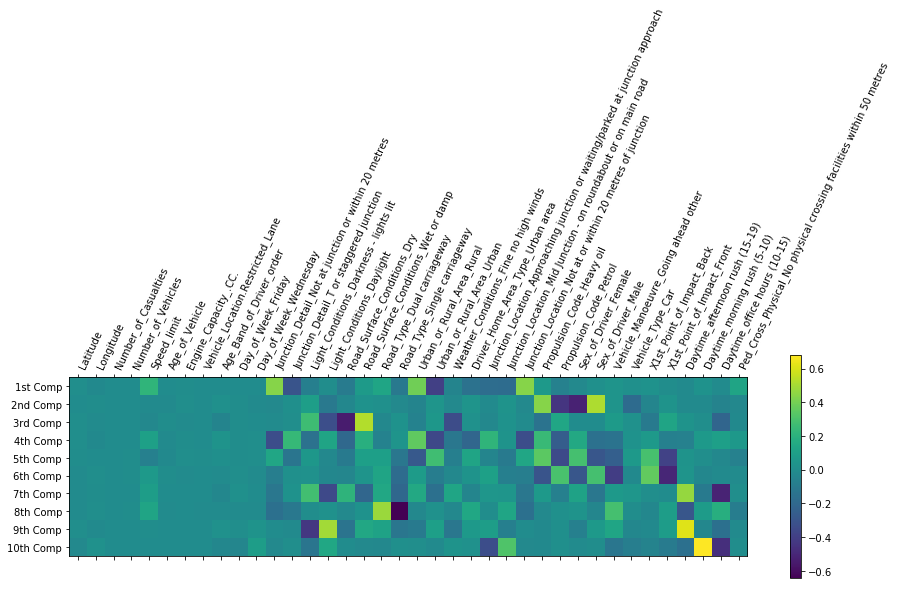

In [157]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp'
                                 ,'7th Comp','8th Comp','9th Comp','10th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(dataset_X_normalized.columns.values)),dataset_X_normalized.columns.values,rotation=65,ha='left')
plt.tight_layout()
plt.show();

The next step would be to sum the contributions of each individual feature across all 10 PCs and identify features with the highest contributions

In [158]:
result=0
for i in range(10):
    result=np.add(result,x[i])

In [159]:
result

array([0.07662194, 0.10052245, 0.00637046, 0.01491014, 0.72711589,
       0.05772826, 0.04343656, 0.01971822, 0.21587184, 0.09537186,
       0.16269238, 1.30659313, 0.87858816, 1.51177109, 1.64070396,
       1.38160918, 1.38352619, 1.24251904, 1.48669665, 1.50839997,
       1.50839997, 0.93755831, 0.86246595, 1.06732217, 1.01432042,
       1.30655883, 1.65947369, 1.66172749, 1.49581942, 1.49581942,
       1.56657044, 0.51209805, 1.00325089, 1.39924924, 1.7311738 ,
       1.05375298, 1.72784364, 0.40831402])

In [160]:
# Get indices of TOP 15 most significant contributors from resulting array (in DESC order)

import heapq
heapq.nlargest(15, range(len(result)), result.__getitem__)

[34, 36, 27, 26, 14, 30, 13, 19, 20, 28, 29, 18, 33, 16, 15]

In [161]:
# TOP 15 features based on contributions in 10 PCs in DESC order (10 PCs explain 70% of the variance in the data)

for i in (34, 36, 27, 26, 14, 30, 13, 19, 20, 28, 29, 18, 33, 16, 15):
    print(y[i])

Daytime_afternoon rush (15-19)
Daytime_office hours (10-15)
Propulsion_Code_Petrol
Propulsion_Code_Heavy oil
Light_Conditions_Daylight
Vehicle_Manoeuvre_Going ahead other
Light_Conditions_Darkness - lights lit
Urban_or_Rural_Area_Rural
Urban_or_Rural_Area_Urban
Sex_of_Driver_Female
Sex_of_Driver_Male
Road_Type_Single carriageway
X1st_Point_of_Impact_Front
Road_Surface_Conditions_Wet or damp
Road_Surface_Conditions_Dry


**CONTINUE WITH TRAINING MODEL USING PCs = 28...**

In [162]:
# LOGISTIC REGRESSION
# Train model
clf_7 = LogisticRegression(solver='saga',max_iter=2500).fit(X_train_PC, Y_train)

In [163]:
# Predict on testing set
pred_y_7 = clf_7.predict(X_validation_PC)

In [164]:
print("Accuracy : ", round(accuracy_score(Y_validation, pred_y_7),4))

Accuracy :  0.8567


In [165]:
# Predict class probabilities
prob_y_7 = clf_7.predict_proba(X_validation_PC)
prob_y_7 = [p[1] for p in prob_y_7]
 
print(roc_auc_score(Y_validation, prob_y_7))

0.6671958586168296


In [166]:
# recall_score
recall_score(Y_validation, pred_y_7)

0.00042799058420714745

In [167]:
# f1 score
f1_score(Y_validation, pred_y_7)

0.0008548835221201111

Both F1 score and Recall have gotten much worse - **accounts to the imbalance in the dataset**

In [168]:
# RANDOM FORREST CLASSIFIER

clf_8 = RandomForestClassifier()
clf_8.fit(X_train_PC, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
# Predict on testing set
pred_y_8 = clf_8.predict(X_validation_PC)

In [170]:
print(accuracy_score(Y_validation, pred_y_8))

0.8431072008828668


In [171]:
# AUROC score
prob_y_8 = clf_8.predict_proba(X_validation_PC)
prob_y_8 = [p[1] for p in prob_y_8]
print( roc_auc_score(Y_validation, prob_y_8) )

0.5961841686913831


In [172]:
# recall_score
recall_score(Y_validation, pred_y_8)

0.0708324416862829

In [173]:
# f1 score
f1_score(Y_validation, pred_y_8)

0.11453287197231833

Improvement in F1 score and Recall using Randomforrest classifer - **again the poor scores for f1 and recall account for imbalance in the dataset**

### Testing models for overfitting using k fold cross validation and scoring = 'recall' 

In [174]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Testing model for overfitting using K-fold CV on the **training dataset**

In [175]:
scoring = 'recall'

In [176]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='saga',max_iter=2500)))
# models.append(('K-NN', KNeighborsClassifier())) - not run here
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))       - not run here

In [177]:
# evaluate each model in turn - K-Fold Cross Validation with k-10 splits
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, x_train_res, y_train_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.300793 (0.083221)
RF: 0.405143 (0.321729)
NB: 0.399325 (0.035109)


Best model in terms of avg recall score is RandomForrest followed by GaussianNB. The mean recall scores for the 10 fold cross validation indicates how well the model deals with overfitting. 

**Starting with best model in terms of avg cross val score and performing some hyper-parameter tuning**

### Hyperparameter Tuning - Random Forrest (Using cv=3,5,7 and different hyperparameter values)

In [178]:
from sklearn.model_selection import GridSearchCV

cv=3

In [179]:
rf = RandomForestClassifier()

parameters = {'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 7], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

grid_obj = GridSearchCV(rf, parameters, cv=3)
grid_obj = grid_obj.fit(x_train_res, y_train_res)
clf_13 = grid_obj.best_estimator_
clf_13.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
pred_y_13 = clf_13.predict(X_test)

In [181]:
print(accuracy_score(y_test, pred_y_13))

0.8426473743907299


AUC: 0.700


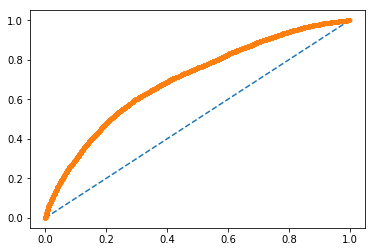

In [182]:
from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

prob_y_13 = clf_13.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob_y_13 = [p[1] for p in prob_y_13]
# calculate AUC
auc = roc_auc_score(y_test, prob_y_13)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y_13)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

# AUROC score
# prob_y_8 = clf_8.predict_proba(X_validation_PC)
# prob_y_8 = [p[1] for p in prob_y_8]
# print( roc_auc_score(Y_validation, prob_y_8) )

In [183]:
# recall_score
recall_score(y_test, pred_y_13)

0.17074742268041238

In [184]:
# f1 score
f1_score(y_test, pred_y_13)

0.23650156180276663

cv=5

In [185]:
rf = RandomForestClassifier()

grid_obj = GridSearchCV(rf, parameters, cv=5)
grid_obj = grid_obj.fit(x_train_res, y_train_res)
clf_16 = grid_obj.best_estimator_
clf_16.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
pred_y_16 = clf_16.predict(X_test)

In [187]:
print(accuracy_score(y_test, pred_y_16))

0.8532233837098802


AUC: 0.688


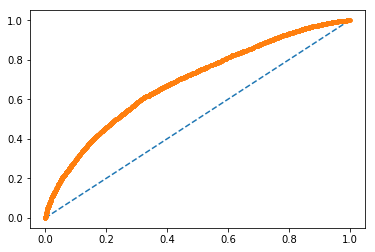

In [188]:
prob_y_16 = clf_16.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob_y_16 = [p[1] for p in prob_y_16]
# calculate AUC
auc = roc_auc_score(y_test, prob_y_16)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y_16)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

In [189]:
# recall_score
recall_score(y_test, pred_y_16)

0.10781786941580757

In [190]:
# f1 score
f1_score(y_test, pred_y_16)

0.17334254143646408

Did not carry out cv=7 as the results do not seem to be improving by much if any and may never get to those produced by GuasisanNB

### Hyperparameter Tuning - GaussianNB (no hyperparameters to tune so no need to carry out gridsearch)

In [ ]:
# Best results produced - 
# Accuracy - 0.7437
# Recall - 0.4050
# f1 score - 0.3109
# Kappa Score - 0.1638

AUC: 0.663


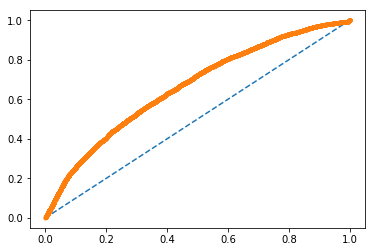

In [192]:
prob_y_12 = clf_12.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob_y_12 = [p[1] for p in prob_y_12]
# calculate AUC
auc = roc_auc_score(y_test, prob_y_12)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y_12)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

### Hyperparameter Tuning - Logistic Regression (Using different values for C and cv)

#### Regularization used is 'L2' Penalty in all cases

cv=3

In [193]:
lr = LogisticRegression(solver='saga',max_iter=2500)

parameters = {'C': [1.e-04, 1.e-02, 1.e+00, 1.e+02]}

grid_obj = GridSearchCV(lr, parameters, cv=3)
grid_obj = grid_obj.fit(x_train_res, y_train_res)
clf_14 = grid_obj.best_estimator_
clf_14.fit(x_train_res, y_train_res)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
pred_y_14 = clf_14.predict(X_test)

In [195]:
print(accuracy_score(y_test, pred_y_14))

0.8045124306428374


AUC: 0.685


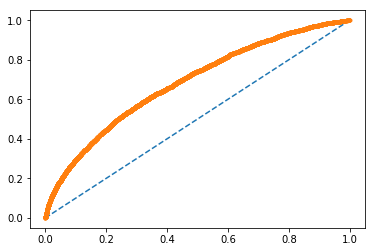

In [196]:
prob_y_14 = clf_14.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob_y_14 = [p[1] for p in prob_y_14]
# calculate AUC
auc = roc_auc_score(y_test, prob_y_14)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y_14)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

In [197]:
# recall_score
recall_score(y_test, pred_y_14)

0.3159364261168385

In [198]:
# f1 score
f1_score(y_test, pred_y_14)

0.31569910934649636

cv=5

In [199]:
lr = LogisticRegression(solver='saga',max_iter=2500)

# parameters = {'C': [1.e-04, 1.e-02, 1.e+00, 1.e+02]}

grid_obj = GridSearchCV(lr, parameters, cv=5)
grid_obj = grid_obj.fit(x_train_res, y_train_res)
clf_15 = grid_obj.best_estimator_
clf_15.fit(x_train_res, y_train_res)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [200]:
pred_y_15 = clf_15.predict(X_test)

In [203]:
print(accuracy_score(y_test, pred_y_15))

0.8045124306428374


AUC: 0.685


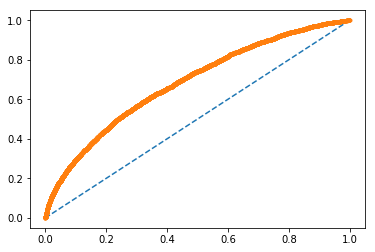

In [204]:
prob_y_15 = clf_15.predict_proba(X_test)
# keep probabilities for the positive outcome only
prob_y_15 = [p[1] for p in prob_y_15]
# calculate AUC
auc = roc_auc_score(y_test, prob_y_15)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob_y_15)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

In [205]:
# recall_score
recall_score(y_test, pred_y_15)

0.3159364261168385

In [206]:
# f1 score
f1_score(y_test, pred_y_15)

0.31569910934649636

although the scores have improved, it is still not as good as of that produced by the GaussianNB model

**Matthew’s correlation coefficient (MCC)**

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 

### Consolidated Results

In [218]:
# Function used to list all results into a list for display

def model_eval(y_true, y_score):
    
    # True positive
    TP = np.sum(y_true * y_score)
    # False positive
    FP = np.sum((y_true == 0) * y_score)
    # True negative
    TN = np.sum((y_true==0) * (y_score==0))
    # False negative
    FN = np.sum(y_true * (y_score==0))
    
#     error_rate = 1 - accuracy

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision) # F1-Score
    specificity = (TN) / (TN + FP)
    MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) # Matthews Correlation Coefficient
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    tnr = 1 - fpr
    auc = (tpr+tnr) / 2   # ROC-AUC for binary classification
    kappa_score=cohen_kappa_score(y_true, y_score) # Cohen’s kappa
    
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['specificity'] = specificity
    out['MCC'] = MCC
    out['AUC'] = auc
    out['kappa_score'] = kappa_score
    
    return out

In [226]:
# To display multiple model results in the same table:

# Best scores for all trained models

LR_result = model_eval(y_test, pred_y_14)
RF_result = model_eval(y_test, pred_y_13)
GB_result = model_eval(y_test, pred_y_11)
NB_result = model_eval(y_test, pred_y_12)
model_results = round(pd.DataFrame([NB_result,LR_result,RF_result,GB_result], index = ['GaussianNB','Logistic Regression','Random Forest','Gradient Boosting']),4)
display(model_results)

,AUC,MCC,accuracy,f_measure,kappa_score,precision,recall,specificity
GaussianNB,0.6026,0.1708,0.7437,0.3109,0.1638,0.2523,0.4051,0.8001
Logistic Regression,0.6009,0.2017,0.8045,0.3157,0.2017,0.3155,0.3159,0.8859
Random Forest,0.5626,0.1799,0.8426,0.2365,0.1630,0.3846,0.1707,0.9545
Gradient Boosting,0.5160,0.1202,0.8589,0.0680,0.0525,0.5915,0.0361,0.9959


#### Consolidated Results before and after hyper-parameter tuning

Logistic Regression

In [220]:
LR_result_1 = model_eval(y_test, pred_y_1)
LR_result_2 = model_eval(y_test, pred_y_14)
# LR_result_3 = model_eval(y_test, pred_y_12)
model_results = round(pd.DataFrame([LR_result_1, LR_result_2], index = ['LR_No_Tuning','LR_with_Tuning']),4)
display(model_results)

,AUC,MCC,accuracy,f_measure,kappa_score,precision,recall,specificity
LR_No_Tuning,0.5994,0.2007,0.8061,0.3135,0.2007,0.3169,0.3101,0.8887
LR_with_Tuning,0.6009,0.2017,0.8045,0.3157,0.2017,0.3155,0.3159,0.8859


Random Forest

In [221]:
RF_result_1 = model_eval(y_test, pred_y_10)
RF_result_2 = model_eval(y_test, pred_y_13)
# LR_result_3 = model_eval(y_test, pred_y_12)
model_results = round(pd.DataFrame([RF_result_1, RF_result_2], index = ['RF_No_Tuning','RF_with_Tuning']),4)
display(model_results)

,AUC,MCC,accuracy,f_measure,kappa_score,precision,recall,specificity
RF_No_Tuning,0.5378,0.1395,0.8491,0.1620,0.1093,0.3905,0.1022,0.9734
RF_with_Tuning,0.5626,0.1799,0.8426,0.2365,0.1630,0.3846,0.1707,0.9545
